# Demo of spectroworks 

## Import dependencies

In [7]:
import matplotlib.pyplot as plt
import pyspectroworks
from datetime import datetime

## Establish connection to SpectroWorks

In [9]:
conn = pyspectroworks.connect('INSERT API KEY')  # change this to match your API key

## Get projects

In [10]:
print('PROJECTS: ')
print('{: >3} {: >24} {: >24}'.format(' ', 'NAME', 'CREATED'))
projects = conn.get_projects()
for i, project in enumerate(projects):
    timestamp = datetime.utcfromtimestamp(project.created/1000).strftime('%Y-%m-%d %H:%M:%S')
    print('{: >3} {: >24} {: >24} '.format(i, project.project_name, timestamp))

PROJECTS: 
                        NAME                  CREATED
  0                    Test1      2020-07-13 14:58:34 
  1           20200722_lotte      2020-07-22 13:35:18 
  2      Juice concentration      2020-07-23 11:52:30 
  3                     Tes5      2020-07-31 13:12:22 


## Open a specific project

In [22]:
values = []
items = projects[2].get_items()
for item in items:
    res = item.results.get('refractive_index', {})
    ri = res.get('value', 'N/A')
    values.append(ri)
    print('{: >6}{:0>2}\t{: >8}'.format(item.box_code, item.cuvette_idx, ri))

TESTER01	1.339745670277606


## Plot all RI values

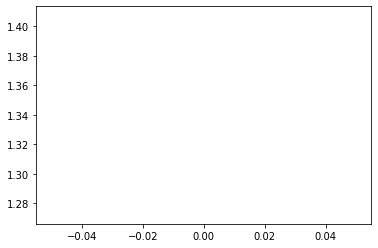

In [23]:
plt.plot(values)

## Plot all spectras

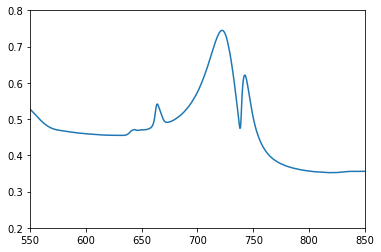

In [33]:
fig = plt.figure()

for item in items:
    spectrum = item.get_spectrum('sample_B')
    wl, values = zip(*spectrum)
    plt.plot(wl, values)

plt.xlim([550,850])
plt.ylim(0.2,0.8)
plt.show()